Evaluación sumativa de la EA 4


In [86]:
# Con el siguiente comando instalaremos Profile Report en Google Colab para luego utilizarlo y tener un análisis más detallado de los datos
# Instalar Profile Report
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=a61b6b3522494cdc864347ef44ef4f4ca9090cf50fffa5236453c3d3c07fa3be
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhsd_on4/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [87]:
#Librerias utilizadas***********************************************************
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import numpy as np
from google.colab import files
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score,classification_report
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings('ignore') # Para evitar los molestosos avisos.
%load_ext google.colab.data_table
%matplotlib inline

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [88]:
#Datos**************************************************************************
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")


Saving weatherAUS.csv to weatherAUS (4).csv


In [89]:
#Mostrar el dataframe***********************************************************
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [90]:
#Con .shape podremos ver la cantidad de columnas y filas que contiene el dataframe
df.shape

(142193, 24)

In [91]:
#Con la siguiente línea de código podremos ver las columnas que contiene el dataframe 
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

# Análisis exploratorio de datos<br>



Descripcion de variables<br>
<br>

---

Columna: Descripción, Tipo de Variable

---
<br>

Date:	Fecha de la observación, Categórica

Location:	Ubicación de la estación meteorológica, Categórica

MinTemp:	Temperatura mínima en grados Celsius, Numérica

MaxTemp:	Temperatura máxima en grados Celsius, Numérica

Rainfall:	Cantidad de lluvia registrada ese día en mm, Numérica

Evaporation:	Evaporación (mm) en 24 horas, Numérica

Sunshine:	Número de horas de sol brillante en el día, Numérica

WindGustDir:	Dirección de la ráfaga de viento más fuerte en 24 horas, Categórica

WindGustSpeed:	Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas, Numérica

WindDir9am:	Dirección del viento a las 9 am, Categórica

WindDir3pm:	Dirección del viento a las 3 pm, Categórica

WindSpeed9am:	Velocidad (km/hr) del viento a las 9 am, Numérica

WindSpeed3pm:	Velocidad (km/hr) del viento a las 3 pm, Numérica

Humidity9am:	Porcentaje de humedad a las 9 am, Numérica

Humidity3pm:	Porcentaje de humedad a las 3 pm, Numérica

Pressure9am:	Presión atmosférica (hpa) a nivel del mar a las 9 am, Numérica

Pressure3pm:	Presión atmosférica (hpa) a nivel del mar a las 3 pm, Numérica

Cloud9am:	Fracción del cielo cubierto por nubes a las 9 am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto, Categórica

Cloud3pm:	Fracción del cielo cubierto por nubes a las 3 pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto, Categórica

Temp9am:	Temperatura en grados Celsius a las 9 am, Numérica

Temp3pm:	Temperatura en grados Celsius a las 3 pm, Numérica

RainToday: Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no, Booleana

RISK_MM:	La cantidad de lluvia. Una especie de medida del "riesgo", Numérica

RainTomorrow:	Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no, Booleana

<br>

## Unidades de medida:

mm: Milímetros

hrs: Hora(s)

km: Kilometro(s)

hpa: Hectopascales 

<br>

## Objetivo del estudio:

Es necesario decir que el objetivo de este estudio es saber determinar la probabilidad de lluvia, con el fin de predecir los siguientes días de lluvia.





In [92]:
# Por petición inicial, se eliminarán las variables "RISK_MM" y "RainToday"
df = df.drop(['RISK_MM','RainToday'],axis=1)

In [93]:
#Análisis exploratorio
#Medidas de estadísticas básicas de las columnas, dependiendo de su tipo.
#Usamos .describe() para mostrar una estadistica básica de los datos como: 
#media aritmética, mínimo, máximo, desviación estándar, los distintos cuartiles y la cantidad de datos de cada columna.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [94]:
#Acontinuación, podemos apreciar información relacionada a los datos.
#datos de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Análisis de correlaciones entre variables

In [95]:
#Usaremos la herramienta ProfileReport para hacer un análisis exhaustivo de los 
#datos con sus medidas estadisticas básicas, gráficos, columnas, etc.
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

En base al análisis desarrollado por la herramienta Profile Report podemos concluir lo siguiente:
* Los datos de las columnas "Pressure9am" y "Pressure3pm" son altamente correlacionadas entre sí.
* Los datos de las columnas "Temp3pm" y "MaxTemp" son altamente correlacionadas entre sí.
* Los datos de las columnas "Temp9am" y "MinTemp" son altamente correlacionadas entre sí

En base a esto, se decidió que se eliminarían las variables "Pressure9am", "MaxTemp" y "Temp9am", ya que alguna de las otras variables fueron seleccionadas para el posterior análisis de regresión y se deben eliminar para no sobreentrenar al modelo.


Descripción general: Estado del conjunto de datos

---

Estadísticas del conjunto de datos

•	Cantidad de Variables: 24

•	Cantidad de datos: 142193

•	Cantidad de datos faltantes: 316559

•	Porcentaje de datos faltantes: 9,3%

•	Columnas duplicadas: no

•	Tipos de variables

•	Categóricas: 7

•	Numérico: 15 

•	Booleana: 2

•	Ceros: Existen variables que presentan muchos 0, como Rainfall (63,5%), en algunos casos estos 0 pueden no ser útiles para el modelo y sesgarlo dramáticamente, más adelante se decidirá si vamos a ocupar o no estas variables por el riesgo que podrían representar.

•	Valores perdidos: Varios modelos no consideran estos valores (ej: Random Forest). Pero el no considerarlo también podría hacer que el modelo pierda objetividad. En este caso tenemos a las siguientes variables con sus respectivos porcentajes de valores perdidos:

Evaporation con un 42,8%

Sunshine con un 47,7%

Cloud9am con un 37,7%

Cloud3pm con un 40,2%

El resto de las variables contienen menos del 10% de datos perdidos. 

•	Datos infinitos: El conjunto no tiene datos infinitos.

•	Tipo de datos: El conjunto presenta correctamente todos los tipos de datos.

•	Según la información que entrega la herramienta ProfileReport existen 17 variables numéricas, 5 categoricas y 2 booleanas. Sin embargo, al analizar la información es posible concluir que las variables Cloud9am y Cloud3pm a pesar de ser del tipo numérico corresponden a variables categóricas, ya que el estado de las nubes se mide en octavas, siendo 0 completamente despejado y 8 completamente cubierto.  

Análisis de variables categóricas en base a la información de La herramienta ProfileReport:

---

Date

---

Alta cardinalidad lo que eventualmente podría ser un problema, ya que podría perder el poder predictivo (al final de la prueba, se sabrá si afecta o no la capacidad de aprendizaje del modelo).

Sin datos faltantes.

---

Location

---

Correlación con: Temp9am, WindDir9am, WirdDir3pm, Temp3pm, Humidity 3pm, MinTemp, Humidity 9am, WindGustDir, MaxTemp.

Cantidad de ciudades 49

Sin datos faltantes

Estos datos deben ser convertidos a numéricos para realizar la regresión, por lo que acontinuación están las ciudad con la asignación del respectivo número que la representara:

1 'Albury' 

2 'BadgerysCreek'

3 'Cobar'

4 'CoffsHarbour'

5 'Moree'

6 'Newcastle'

7 'NorahHead'

8 'NorfolkIsland'

9 'Penrith'

10 'Richmond'

11 'Sydney'

12 'SydneyAirport'

13 'WaggaWagga'

14 'Williamtown'

15 'Wollongong'

16 'Canberra'

17 'Tuggeranong'

18 'MountGinini'

19 'Ballarat'

20 'Bendigo'

21 'Sale'

22 'MelbourneAirport'

23 'Melbourne'

24 'Mildura'

25 'Nhil'

26 'Portland'

27 'Watsonia'

28 'Dartmoor'

29 'Brisbane'

30 'Cairns'

31 'GoldCoast'

32 'Townsville'

33 'Adelaide'

34 'MountGambier'

35 'Nuriootpa'

36 'Woomera'

37 'Albany'

38 'Witchcliffe'

39 'PearceRAAF'

40 'PerthAirport'

41 'Perth'

42 'SalmonGums'

43 'Walpole'

44 'Hobart'

45 'Launceston'

46 'AliceSprings'

47 'Darwin'

48 'Katherine'

49 'Uluru'

---

WindGustDir

---
Correlación con WindDir9am, Location, WindDir3pm.

Datos perdidos: 6,6%

Se comprende que los datos almacenados en la variable corresponden a los puntos de una brújula (puntos cardinales), son 16. Al explorar los datos podemos ver que hay 17 datos distintos, ya que esta considerando los datos faltantes (NaN).

En la pestaña Chararters se puede apreciar cuales son las letras que mas se repiten, siendo S la con mayor frecuencia (26.9%) y N la con menor frecuencia (22.7%), ¿Tendrá esto importancia en la investigación?, Mas adelante se sabrá.

Los datos están en categorías y el nombre esta resumido, por lo que aquí esta la tabla de los puntos cardinales y los respectivos números que se utilizarán para representar a los datos para convertilos de letras a números para poder realizar la regresión lineal:

1	 N:   Norte

2	 NNE: Nornoreste

3	 NE:  Noreste

4	 ENE: Estenoreste

5	 E: Este

6	 ESE: Estesureste

7	 SE: Sureste

8  SSE: Sursureste

9	 S: Sur

10 SSW: Sursuroeste

11 SW: Suroeste

12 WSW: Oestesuroeste

13 W: Oeste

14 WNW: Oestenoroeste

15 NW: Noroeste

16 NNW: Nornoroeste

A los valores Nan de esta variable se le asignara el numero 17

Estas categórias tambien pueden ser utilizadas para las variables WindDir3pm y WindDir9am ya que estas variables presentan las mismas categorias.

---

WindDir9am

---

Se comprende que los datos almacenados en la variable corresponden a los puntos de una brújula (puntos cardinales), son 16. Al explorar los datos podemos ver que hay 17 datos distintos, ya que está considerando los datos faltantes (NaN).

En la pestaña Chararters se puede apreciar cuales son las letras que más se repiten, siendo N la con mayor frecuencia (25,6%) y W la con menor frecuencia (23.7%), ¿Tendrá esto importancia en la investigación?, Mas adelante se sabrá.

---

WindDir3pm

---
Se comprende que los datos almacenados en la variable corresponden a los puntos de una brújula (puntos cardinales), son 16. Al explorar los datos podemos ver que hay 17 datos distintos, ya que está considerando los datos faltantes (NaN).


En la pestaña Chararters se puede apreciar cuales son las letras que más se repiten, siendo S la con mayor frecuencia (26,6%) y N la con menor frecuencia (22.9%), ¿Tendrá esto importancia en la investigación?, Mas adelante se sabrá.

Estos datos se aproximan a los datos que se alojan en la variable WindGustDir. ¿Sera que las ráfagas de viento de más velocidad en 24 horas se dan cerca de las 3pm?

---

Cloud9am

---
La herramienta ProfileReport Indica que la variable es numérica, sin embargo, se ha descubierto que es Categórica, ya que los números representan la escala de nubosidad la cual se mide en octavas.

Escala de nubosidad

0: cielo despejado

1: 1/8 de cielo cubierto

2: 2/8 de cielo cubierto

3: 3/8 de cielo cubierto

4: 4/8 de cielo cubierto

5: 5/8 de cielo cubierto

6: 6/8 de cielo cubierto

7: 7/8 de cielo cubierto

8: 8/8 de cielo cubierto

9: cielo oscurecido

La escala tambien es aplicable para la variable Cloud3pm

Dentro de la escala de nubosidad en el enunciado no se consideró un estado de las nubes llamado completamente oscurecido, sin embargo, aparece en los datos del estudio y correspondería al número 9.

Datos distintos 10, la tabla es del 1 al 9 y considera también los datos faltantes (NaN).

Del histograma a simple vista se puede apreciar que las nubes a las 9 am de los días del estudio son frecuentemente 7/8 de cielo cubierto, 1/8 de cielo cubierto y 8/8 de cielo cubierto. También se puede concluir que no se considero el cielo oscurecido ya que existen tan pocos días con este tipo de nubes, que considerarlo en el histograma es innecesario y no aporta información útil al gráfico.

Al ingresar a la pestaña de valores comunes (common values) se puede afirmar la información relacionada a los días de nubes con cielo completamente oscurecido, ya que durante el estudio solo hubo 2 días con este tipo de nubes a las 9 am, por lo que representan menos del 0,1% del total de datos recolectados de la variable.

---

Cloud3pm   

---

Dentro de la escala de nubosidad en el enunciado no se consideró un estado de las nubes llamado completamente oscurecido, sin embargo, aparece en los datos del estudio y correspondería al número 9.

Datos distintos 10, la tabla es del 1 al 9 y considera también los datos faltantes (NaN).

Del histograma a simple vista se puede apreciar que las nubes de los días del estudio son frecuentemente 7/8 de cielo cubierto, 1/8 de cielo cubierto y 8/8 de cielo cubierto. También se puede concluir que no se consideró el cielo oscurecido ya que existen tan pocos días con este tipo de nubes, que considerarlo en el histograma es innecesario y no aporta información útil al gráfico.

Al ingresar a la pestaña de valores comunes (common values) se puede afirmar la información relacionada a los días de nubes con cielo completamente oscurecido, ya que durante el estudio solo hubo 1 día con este tipo de nubes a las 3pm, por lo que representan menos del 0,1% del total de datos recolectados de la variable.



















Análisis de variables Booleanas

---

RainTomorrow

---
Días en los que no llovió corresponden al 77,6% del total de los días del estudio.

Días en los que si llovió corresponden al 22,4% del total de los días del estudio.

Se estima que esta variable sirve para compararla con RainToday y ver con qué frecuencia llueve un día y al siguiente.




## Limpieza y transformación de datos

### Eliminar variables correlacionadas

Eliminaremos las columnas que son altamente correlacionadas y que no afecten a nuestro consiguiente análisis.

In [96]:
df1 = df
df1 = df1.drop(['Temp9am','Pressure9am','MaxTemp'],axis=1)

Aquí podemos asegurarnos de que las columnas antes nombradas fueron eliminadas.

In [97]:
df1.columns

Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

### Missing Values

Con el siguiente bloque de código mostraremos las columnas que contienen nulos y su respectivo porcentaje.

In [98]:
def checkna(df1):
    missing_values= df1.isna().sum().reset_index()
    missing_values.columns= ["Nombre de columnas", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(df1)*100
,2)
    return missing_values[missing_values.Missing_Values > 0 ]

checkna(df1)

,Nombre de columnas,Missing_Values,Missing_Percent
2,MinTemp,637,0.45
3,Rainfall,1406,0.99
4,Evaporation,60843,42.79
5,Sunshine,67816,47.69
6,WindGustDir,9330,6.56
7,WindGustSpeed,9270,6.52
8,WindDir9am,10013,7.04
9,WindDir3pm,3778,2.66
10,WindSpeed9am,1348,0.95
11,WindSpeed3pm,2630,1.85


Con lo anterior mostrado, se puede ver que las columnas con un porcentaje importante de nulos son: "Sunshine", "Evaporation", "Cloud3pm" y "Cloud9am".
Decidimos que para el análisis posterior de regresión, no usaremos ninguna de las variables antes mencionadas, por ende, éstas se eliminarán del dataframe ya que determinamos que su porcentaje de missing values es muy alto como para poder rellenarlas con el promedio de sus propios datos.

En cambio las otras columnas se rellenarán con su promedio respectivo.

In [99]:
df1 = df1.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1)

Aqui podremos ver que ya no estan las columnas "Sunshine" y "Cloud9am".

In [100]:
df1.columns

Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Temp3pm',
       'RainTomorrow'],
      dtype='object')

In [101]:
df1

,Date,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,21.8,No
1,2008-12-02,Albury,7.4,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,24.3,No
2,2008-12-03,Albury,12.9,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,23.2,No
3,2008-12-04,Albury,9.2,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,26.5,No
4,2008-12-05,Albury,17.5,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1021.2,20.9,No
142189,2017-06-21,Uluru,2.8,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1020.3,22.4,No
142190,2017-06-22,Uluru,3.6,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1019.1,24.5,No
142191,2017-06-23,Uluru,5.4,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1016.8,26.1,No


Trataremos los datos que contienen nulos, llenando las variables númericas con su promedio y las categóricas con "Sin información".

In [102]:
df1 = df1.fillna(df1.median())

In [103]:
pd.set_option('mode.chained_assignment',None)
# Llena los datos nulos de las variables categóricas con "Sin información"
df1["WindGustDir"].fillna("Sin información", inplace = True)
df1["WindDir9am"].fillna("Sin información", inplace = True)
df1["WindDir3pm"].fillna("Sin información", inplace = True)


pd.set_option('mode.chained_assignment','warn')
df1

,Date,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,21.8,No
1,2008-12-02,Albury,7.4,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,24.3,No
2,2008-12-03,Albury,12.9,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,23.2,No
3,2008-12-04,Albury,9.2,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,26.5,No
4,2008-12-05,Albury,17.5,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1021.2,20.9,No
142189,2017-06-21,Uluru,2.8,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1020.3,22.4,No
142190,2017-06-22,Uluru,3.6,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1019.1,24.5,No
142191,2017-06-23,Uluru,5.4,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1016.8,26.1,No


Nos aseguramos que los datos nulos fueron rellenados

In [104]:
def checkna(df1):
    missing_values= df1.isna().sum().reset_index()
    missing_values.columns= ["Nombre de columnas", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(df1)*100
,2)
    return missing_values[missing_values.Missing_Values > 0 ]

checkna(df1)

,Nombre de columnas,Missing_Values,Missing_Percent


### Transformación de Datos

Reemplazaremos los datos de las variables categóricas a numeros, para luego no tener problemas con nuestro análisis de regresión.

In [105]:
# reemplazar los valores categóricos entre 0 y 1
df1['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)

# reemplazar los valores categóricos desde 1 en adelante
df1['WindGustDir'].replace({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'Sin información':17},inplace = True)
df1['WindDir9am'].replace({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'Sin información':17},inplace = True)
df1['WindDir3pm'].replace({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'Sin información':17},inplace = True)
df1['Location'].replace({'Albury':1,'BadgerysCreek':2,'Cobar':3,'CoffsHarbour':4,'Moree':5,'Newcastle':6,'NorahHead':7,'NorfolkIsland':8,'Penrith':9,'Richmond':10,'Sydney':11,
                         'SydneyAirport':12,'WaggaWagga':13,'Williamtown':14,'Wollongong':15,'Canberra':16,'Tuggeranong':17,'MountGinini':18,'Ballarat':19,'Bendigo':20,
                         'Sale':21,'MelbourneAirport':22,'Melbourne':23,'Mildura':24,'Nhil':25,'Portland':26,'Watsonia':27,'Dartmoor':28,'Brisbane':29,'Cairns':30,
                         'GoldCoast':31,'Townsville':32,'Adelaide':33,'MountGambier':34,'Nuriootpa':35,'Woomera':36,'Albany':37,'Witchcliffe':38,'PearceRAAF':39,
                         'PerthAirport':40,'Perth':41,'SalmonGums':42,'Walpole':43,'Hobart':44,'Launceston':45,'AliceSprings':46,'Darwin':47,'Katherine':48,'Uluru':49},inplace = True)

# Para la variable Date, se convertirá en númerico dependiendo de su mes
df1['Date'] = pd.to_datetime(df1.Date, format='%Y-%m-%d')
df1['Date'] = df1['Date'].dt.strftime('%m')

df1['Date'].replace({'01':1,'02':2,'03':3,'04':4,'05':5,'06':6,'07':7,'08':8,'09':9,'10':10,'11':11,'12':12},inplace = True)

# Renombrar columna Fecha a Mes
df1.rename(columns={'Date':'Month'},inplace = True)


In [106]:
df1

,Month,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp3pm,RainTomorrow
0,12,1,13.4,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,21.8,0
1,12,1,7.4,0.0,14,44.0,16,12,4.0,22.0,44.0,25.0,1007.8,24.3,0
2,12,1,12.9,0.0,12,46.0,13,12,19.0,26.0,38.0,30.0,1008.7,23.2,0
3,12,1,9.2,0.0,3,24.0,7,5,11.0,9.0,45.0,16.0,1012.8,26.5,0
4,12,1,17.5,1.0,13,41.0,4,15,7.0,20.0,82.0,33.0,1006.0,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6,49,3.5,0.0,5,31.0,6,5,15.0,13.0,59.0,27.0,1021.2,20.9,0
142189,6,49,2.8,0.0,5,31.0,7,4,13.0,11.0,51.0,24.0,1020.3,22.4,0
142190,6,49,3.6,0.0,16,22.0,7,1,13.0,9.0,56.0,21.0,1019.1,24.5,0
142191,6,49,5.4,0.0,1,37.0,7,14,9.0,9.0,53.0,24.0,1016.8,26.1,0


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          142193 non-null  int64  
 1   Location       142193 non-null  int64  
 2   MinTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  int64  
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  int64  
 7   WindDir3pm     142193 non-null  int64  
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure3pm    142193 non-null  float64
 13  Temp3pm        142193 non-null  float64
 14  RainTomorrow   142193 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 16.3 MB


### Gráficos

Gráfico 1

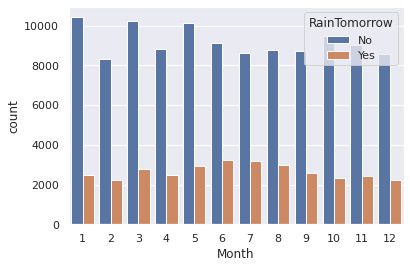

In [108]:
# Seleccionamos el mes de la fecha
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Luego, dejamos en el eje x la variable mes y la comparamos con la variable RainTomorrow
sns.countplot(x = 'Month', hue =  'RainTomorrow', orient = 'h', data = df)

En el siguiente grafico se puede observar una comparación de la cantidad de días en los que sí llovió al día siguiente por mes versus los que no llovió al día siguiente por mes.
De lo cual podemos concluir que: 
Enero es el mes con la mayor cantidad de días en los que al día siguiente no llueve.
Febrero es el mes con la menor cantidad de días en los que al día siguiente no llueve.
Junio es el mes con la mayor cantidad de días en los que al día siguiente si llueve.
Febrero es el mes con la menor cantidad de días en los que al día siguiente si llueve.

Gráfico 2

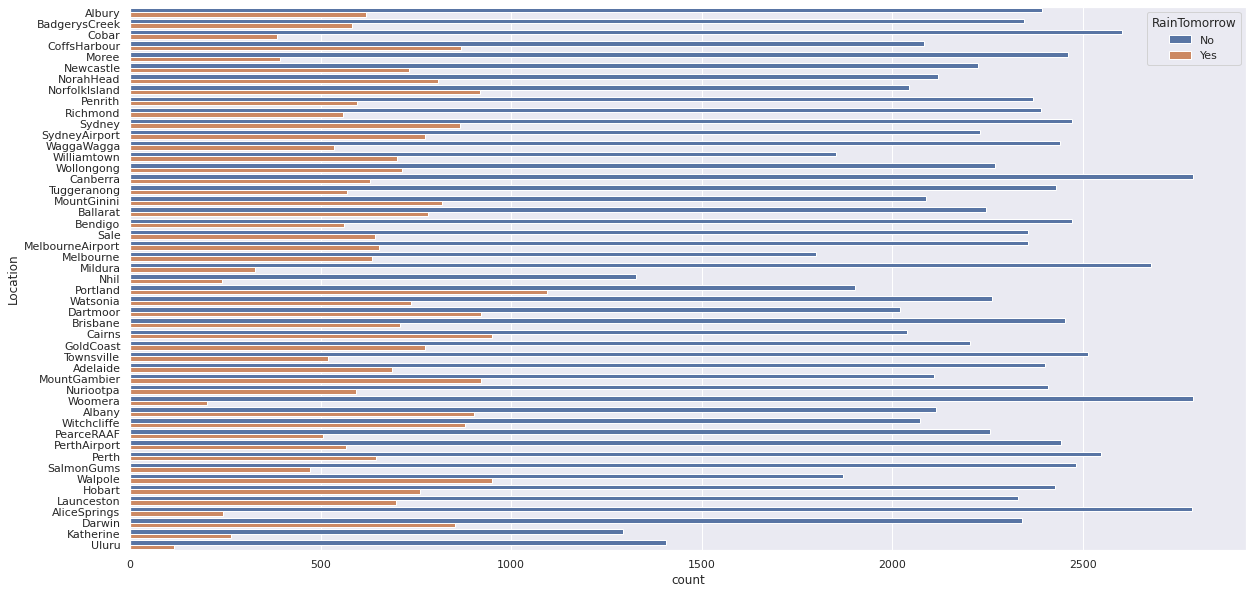

In [109]:
plt.figure(figsize=(20, 10))
sns.countplot(y = 'Location', hue =  'RainTomorrow', orient = 'h', data = df)

En el gráfico anterior se puede observar los dias en los que no llovío al dia siguiente y los que si llovio al día siguiente, separados por ciudad. 
Portland tiene la mayor cantidad de días siguientes en los que llovió, en comparación con Ululu que tiene la menor cantidad de días en los que llovió al día siguiente.
AliceSpring tiene la mayor cantidad de días siguientes en los que no llovió, en comparación a Katherine que tiene la menor cantidad de dias en los que no llovió al dia siguiente.
En conclusion, existen más dias en los que no llueve al día siguiente en comparación a los días siguientes en los que si llueve.

Para el siguiente graficos es necesario calcular el promedio de lluvia de acuerdo a mes y locación.

Lo que se presenta aqui es el promedio de lluvia para cada mes y para cada locación.

In [110]:
gb_df = pd.DataFrame(df.groupby(["Location","Month"],as_index=False)["Rainfall"].mean())
gb_df.head()

,Location,Month,Rainfall
0,Adelaide,1,0.772593
1,Adelaide,2,0.883784
2,Adelaide,3,1.213636
3,Adelaide,4,1.434335
4,Adelaide,5,2.252632


A continuacion es necesario transformar el objeto anterior para poder graficarlo con un heat map.
Se realizara con la siguiente función y que dependerá de los paramátros Month, Location y Rainfall.

In [111]:
data = gb_df.pivot("Month","Location","Rainfall")
data

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.772593,0.887636,1.475269,2.093478,2.697744,1.238095,1.286643,6.556716,13.814337,1.594175,1.077941,5.945902,1.404065,14.627240,5.582308,1.406498,9.940984,1.381720,1.013131,0.913262,1.110469,2.684375,1.082437,2.684211,3.822581,1.103226,3.337879,2.226119,0.515412,0.367816,3.368582,0.486738,0.556989,1.397834,3.090909,1.087365,1.194224,3.127599,2.810753,8.776173,1.972894,1.110000,1.294074,1.054478,1.247273,3.906383,0.170769,3.317690,0.665468
2,0.883784,0.692825,2.372222,1.860177,2.970233,1.178704,1.454464,4.888889,16.769912,2.312253,1.675221,8.152655,1.182653,16.736283,5.504762,1.116814,7.662385,1.045133,2.185612,1.332743,1.425664,2.547619,0.963393,3.608295,4.041935,0.473874,3.518919,4.189862,1.220354,0.725455,4.109346,0.856637,0.636283,1.196396,3.700935,1.738462,1.040000,4.323922,3.178761,11.550000,3.559070,0.903846,1.925346,0.934234,1.576991,3.411828,0.311312,3.999078,0.791743
3,1.213636,1.156296,2.156134,0.843728,3.590441,1.381227,1.524014,4.701471,11.356272,1.973510,1.280866,6.641367,1.408029,8.589247,5.696970,1.277256,7.072483,1.830037,1.431250,1.315412,1.033692,1.761134,1.365343,3.291829,3.653441,0.424324,4.271273,3.329008,1.047670,0.942751,2.728571,0.646595,0.634409,1.743590,3.458964,1.428674,1.369565,4.483871,3.930403,8.868592,2.766543,0.522059,2.335766,1.094030,1.552174,4.096970,1.057455,6.104089,0.350538
4,1.434335,2.066379,2.000833,0.695359,2.774684,1.523333,1.557500,2.836752,5.901277,1.247212,0.693333,5.544681,1.850000,3.340000,6.172766,0.875000,1.140000,1.641667,2.129730,1.443333,1.035000,0.911211,1.784874,2.764486,5.048387,0.836000,4.165254,2.710000,1.447083,1.094064,2.524675,1.112500,0.946667,2.263333,3.125000,1.574583,0.457500,5.194815,4.558333,1.760833,1.797479,0.551825,1.040343,1.964706,1.989167,6.307937,1.853782,4.153778,0.776793
5,2.252632,2.546909,1.616727,0.506859,1.441860,1.411470,1.326007,2.926866,3.063670,0.827273,1.213620,4.142435,2.701075,0.843728,3.285926,1.610753,0.340645,2.200358,1.482629,0.987814,0.725448,1.152344,2.560145,2.171642,2.712177,1.278710,3.702545,3.014079,1.441516,2.204701,0.916912,2.960573,2.517563,3.128315,1.081884,1.067384,1.002963,2.434194,2.363441,1.098925,0.863273,1.111940,1.503321,4.244275,1.522581,2.764078,4.824373,2.302256,0.477061
6,2.234646,3.923166,1.975665,0.174242,3.102381,1.745660,1.753208,2.580916,1.751698,1.648276,1.623396,7.180377,2.959245,0.003788,4.007059,1.843019,0.000699,2.531154,1.803175,1.573585,0.615094,1.187854,2.980916,3.550661,4.807576,1.600000,5.854118,4.265660,1.809091,2.561373,2.393182,3.604528,3.058113,3.913208,2.534866,1.874717,1.162712,5.851877,5.004528,0.757414,2.039370,0.631206,1.927547,5.479661,2.067170,5.829688,6.012500,6.094606,0.508712
7,2.944275,3.839113,2.256452,0.718548,1.009756,2.183871,2.154839,1.003623,1.045968,1.313718,1.011290,1.875806,3.616129,0.000717,1.720000,1.680000,0.042623,2.903279,1.627586,1.175806,0.626210,1.187013,3.637097,3.985849,2.313223,1.391935,2.922951,3.545968,2.060246,3.824623,0.792469,4.300358,3.683871,4.304032,0.780992,1.185484,1.099578,2.853047,2.612903,0.692742,1.461345,0.277049,1.668548,5.683700,1.732520,2.992179,6.793548,2.368033,0.389113
8,2.476494,3.775403,2.239837,0.196774,1.372532,2.232258,2.032258,1.276534,0.716935,1.365343,0.662295,2.612903,3.523577,0.010036,2.006612,1.967025,0.000000,3.247177,1.680976,1.151613,0.586179,0.843290,3.531707,2.996330,1.638710,0.862903,2.026667,4.003226,1.819355,3.486190,1.060331,3.278853,3.761290,4.019512,1.059829,1.470161,1.179839,2.156272,2.213710,0.5

Despues, se debe convertir la tabla anterior en un grafico, lo cual debe hacerse con la instruccion que esta acontinuación:

Gráfico 3

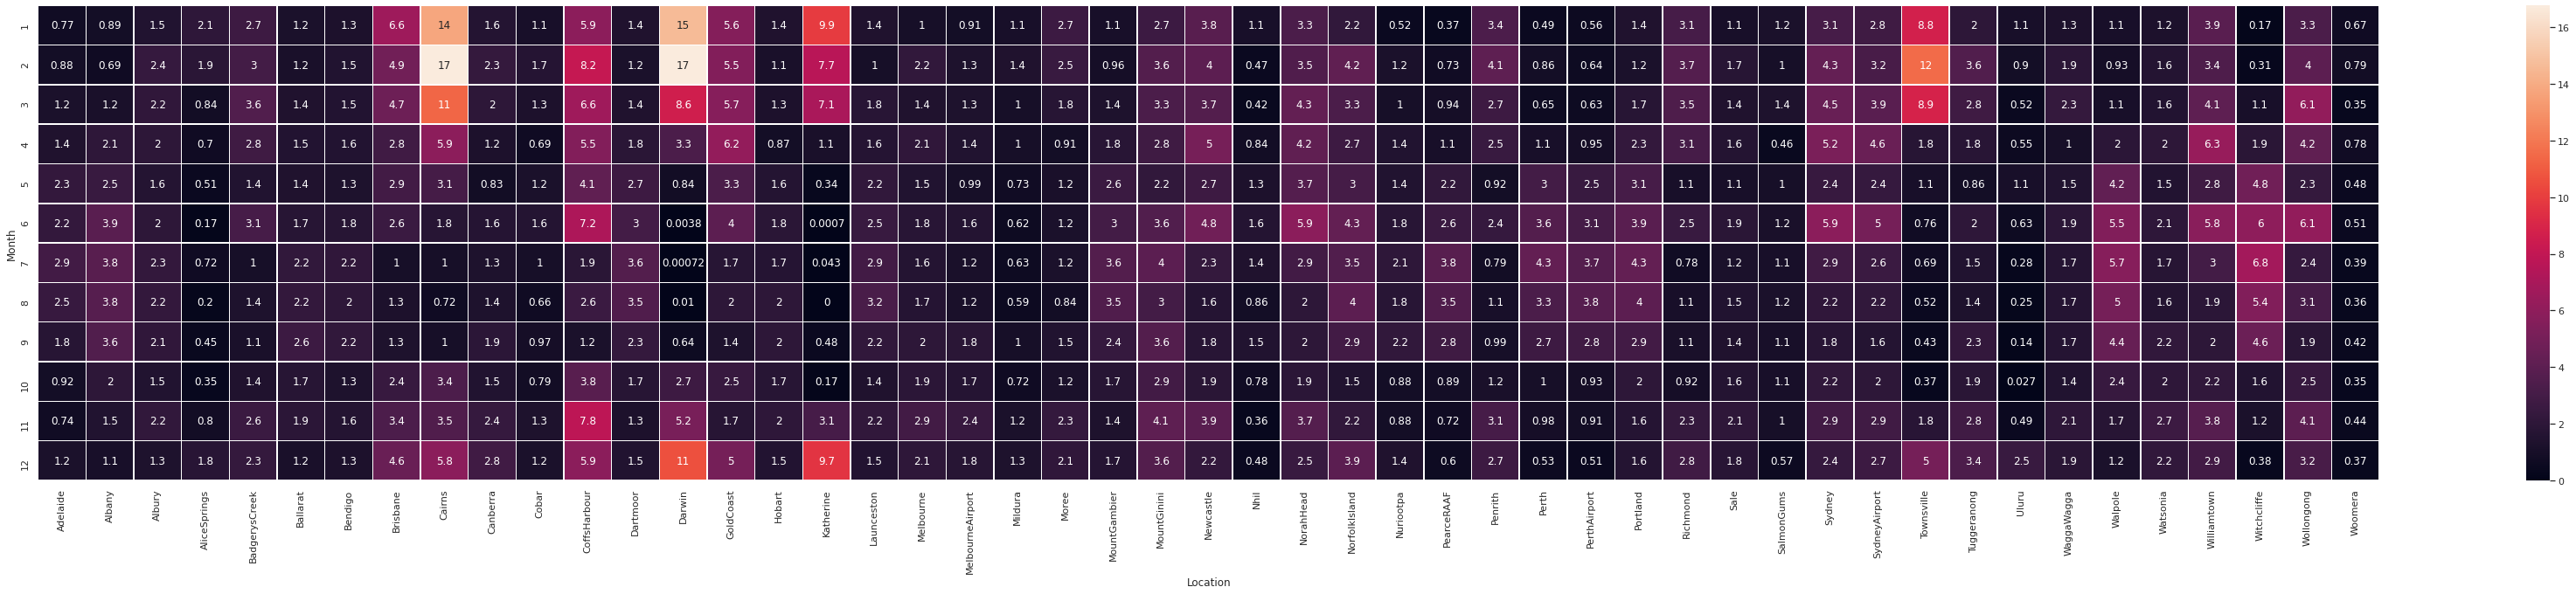

In [112]:
#ajustar el tamaño del gráfico
sns.set(rc={'figure.figsize':(60,10)})
#heat map
sns.heatmap(data = data,annot=True,linewidths=.5)

El mapa de calor entrega mucha información:

*   Se puede apreciar el promedio de la cantidad de lluvia de acuerdo a la localidad y el mes.
*   Al lado derecho esta la escala de valores del promedio de lluvia, en donde 0 indica no ha llovido y 17 que ha llovido.

Por lo que se puede determinar que:

Conclusiones en relación al grafico 1 y el grafico 3:
*   Si se compara este gráfico con el gráfico 1 es interesante ver que Portland tiene gran cantidad de dias en los que sí llovió al dia siguiente y al compararlo con este grafico se puede apreciar que en promedio llueve gran cantidad de los meses del año, lo que significa que sus lluvias son de baja intensidad. 
*   Si se compara este gráfico con el gráfico 1 en interesante ver que Ululu tiene la menor cantidad de días en los que al día siguiente llueve y es porque en Ululu en promedio llueve poco y con poca intensidad.
*   Si se compara este gráfico con el gráfico 1 en interesante ver que AliceSpring tiene mucha cantidad de dias en los que al dia siguiente no llueve y es porque en AliceSpring en promedio llueve poco y además la cantidad de lluvia más significativa se concentra en los meses de Enero, Febrero y Diciembre.
*   Si se compara este grafico con el gráfico 1 es interesante ver que Katherine tiene la menor cantidad de días en los que no llovió al dia siguiente, sin embargo, al mirar la tabla se puede concluir que la lluvia se concentra en promedio en los meses de Noviembre, diciembre, enero, febrero y marzo y en los otros meses casi no llueve, por lo que tambien se puede determinar que, cuando llueve es con mucha intensidad.

Conclusiones en relacion al grafico 2 y el grafico 3:
*   Si se compara este grafico con el gráfico 2 es interesante ver que Enero es el mes con la mayor cantidad de días en los que no llueve, pero al observar este gráfico se puede ver que gran cantidad de ciudades concentran la mayor cantidad de lluevias en este mes, por lo que se puede concluir que en promedio llueve menos dias pero con mayor intensidad.
*   Si se compara este gráfico con el gráfico 2 es interesante ver que en Febrero es el mes con la menor candidad de días en los que no llueve y guarda relacionar directa con el hecho de que existen muchos lugrares con altos promedios de lluvia en ese mes.

*   Si se compara este grafico con el gráfico 2 es interesante ver que Junio es el mes con la mayor cantidad de días en los que si llueve y al mirar el heatmap se puede apreciar que en promedio no llueve ni mucho ni poco, por lo que se puede concluir que llueve más dias pero a una intensidad moderada.

Gráfico 4

(0.0, 40.0)

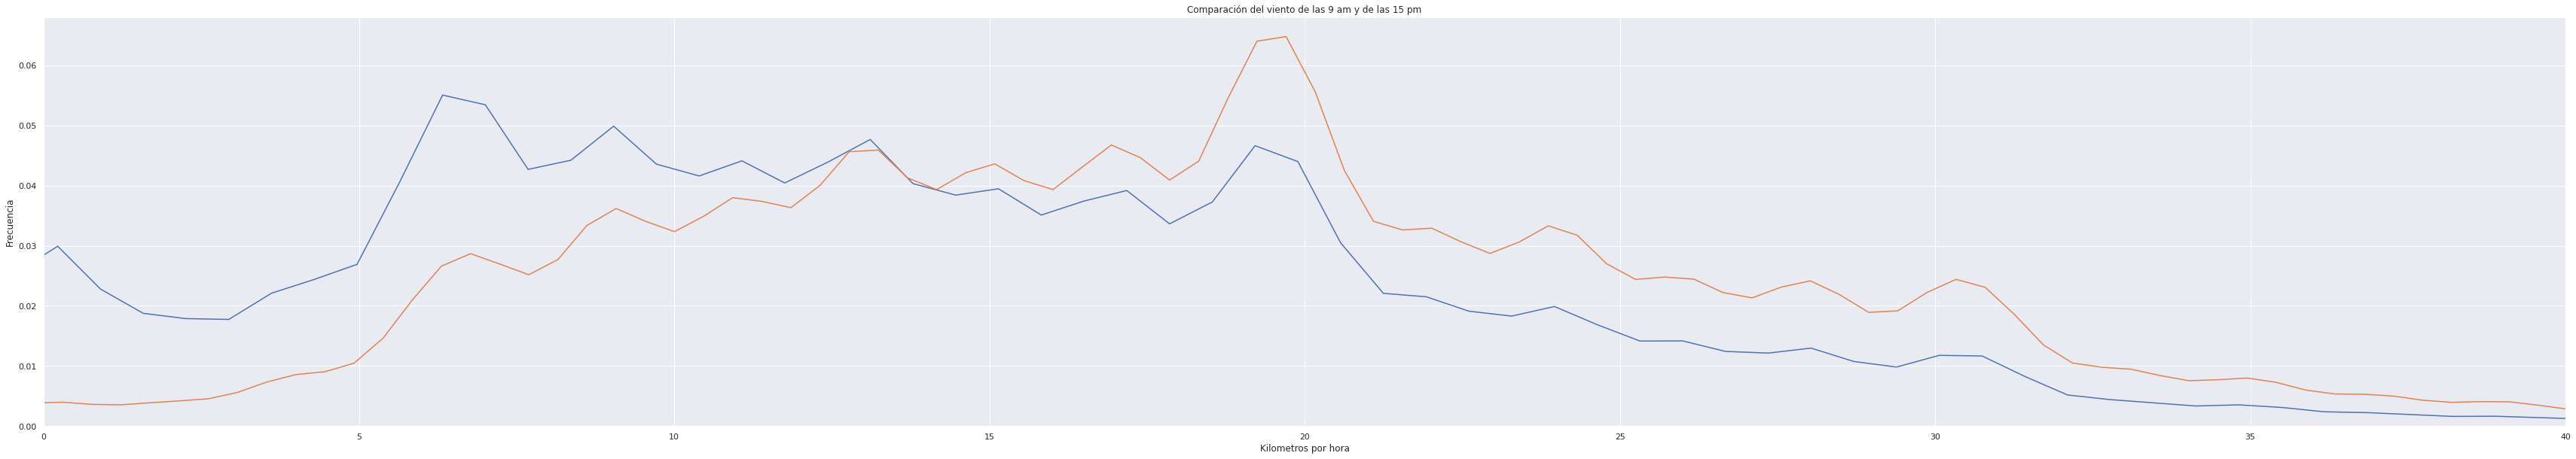

In [138]:
#Grafico de distribución comparativo de la velocidad del viento de las 9am y el de las 15pm
sns.kdeplot(df["WindSpeed9am"]) #rojo
sns.kdeplot(df["WindSpeed3pm"]) #azul
plt.title('Comparación del viento de las 9 am y de las 15 pm')
plt.ylabel('Frecuencia')
plt.xlabel('Kilometros por hora')

plt.xlim(0,40)

Conclusión e interpretación
<br><br>
El siguiente histograma presenta una comparacion de la velocidad a las 9 am y la velocidad a las 3pm,
existen muchos outlayers despues de los 40 km por hora por lo que se ha decidido cortar el grafico para ver las velocidades que mas se repiten 
se puede ver en el histograma que la velocidad más frecuente a las 3pm es aproximadamente 17 km/hr
mientras que la velocidad mas frecuente a las 9 am es aproximadamente 7 km/hr
se puede ademas apreciar que: 
las velocidades mas bajas son durante las 9am
y las velocidades mas altas son durante las 3pm.

# Clasificación a la variable Rain Tomorrow

Para la clasificación se utilizará la variable RainTomorrow, es por esto que en primer lugar veremos como estan distribuidos los datos de ésta.

In [113]:
df1.groupby('RainTomorrow').size()

RainTomorrow
0    110316
1     31877
dtype: int64

Para visualizarlo y entenderlo de mejor manera, utilizaremos un gráfico.

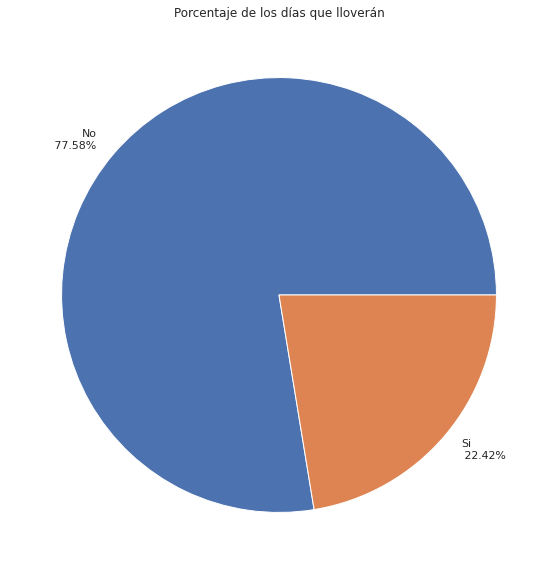

In [114]:
clases = np.array([df1[df1.RainTomorrow == 0.0].shape[0],df1[df1.RainTomorrow == 1.0].shape[0]])
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No\n ' + labels[0]
labels[1] = 'Si\n ' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de los días que lloverán')
plt.show()

Podemos ver que en un 77,58% no lloverá al día siguiente, mientras que un 22,42% sí lo hará. También, se puede analizar que existe un desbalanceo de datos, estando una gran parte de los datos distribuidos en los siguientes días que no lloverán.

Según estudios realizados sobre meteorología, logramos determinar que la lluvia depende de tres grandes factores: La presión atmosférica, la temperatura y especialmente la humedad atmosférica. Es por eso que hemos decidido utilizar las variables "Temp3pm", "Pressure3pm" y "Humidity3pm", ya que en conjunto se utilizan para predecir días de lluvia.

## Algoritmos con parámetros por defecto

### K-Neighbors Classifier

En primer lugar, separaremos el training set y testing set.

In [115]:
# **********************************************************************************
# División de training set y testing set
# **********************************************************************************

X = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

Luego, usaremos el algoritmo de clasificación K Neighbors

In [116]:
# **********************************************************************************
# K Neighbors
# **********************************************************************************

In [117]:
# Creación del modelo
# **********************************************************************************
modelo = KNeighborsClassifier()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Predicción 
y_pred = modelo.predict(X_test)

# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Matriz de Confusión:')
print(matriz)
print()

# Evaluación del modelo
print("_________")
print('Reporte del modelo:')
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[ 3252  3152]
 [ 1366 20669]]

_________
Reporte del modelo:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22035
           1       0.70      0.51      0.59      6404

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.75     28439
weighted avg       0.83      0.84      0.83     28439



Cantidad de valores reales: 28439(Positivos 6404(1) - Negativos 22035(0))

<br>

Acontinuación el resultado con K Neighbors con los parámetros por defecto:

1) Matriz de confusión: Existen 23921(3252 VP y 20669 VN) datos correctos y 4518(3152 FP y 1366 FN) datos incorrectos. Sigue sin cumplir con las expectativas para predecir valores positivos, aunque es muy bueno para predecir valores negativos.

2) Accuracy: Tiene un accuracy del 84%, es decir, el modelo acertó en un 84% de las predicciones realizadas, pero falló en un 16%.

3) Precision: Tiene una buena precisión al momento de predecir valores negativos(87%) y también para predecir valores positivos (70%).

4) Recall: Tiene un recall para valores positivos de un 51%, es decir que lo detecta en un 51% de las veces y para negativos un 94% de las veces. Por lo cual es un modelo bueno para detectar valores negativos, pero malo para detectar valores positivos.

5) F1-score:  Al ser un resultado basado en la media harmónica entre la precision y el recall (2precisionrecall/(precision+recall)), es una métrica que representa a ambas en sólo un número. Tiene un 90% para los valores negativos y un 59% para los positivos, por lo cual el modelo funciona bien para detectar valores negativos, aunque no tanto para los positivos.



### Árbol de decisión

En primer lugar, dividimos el training y testing set.

In [118]:
# **********************************************************************************
# División de training set y testing set
# **********************************************************************************

X2 = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

X2_train, X2_test, y2_train, y2_test = train_test_split(
                                        X2,
                                        y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

Como segundo algoritmo de clasificación, usaremos el árbol de decisión.

In [119]:
# **********************************************************************************
# Árbol de decisión
# **********************************************************************************

In [120]:
# Creación del modelo
# **********************************************************************************
modelo = DecisionTreeClassifier()
# Entrenamiento del modelo
modelo.fit(X2_train, y2_train)
# Predicción 
y2_pred = modelo.predict(X2_test)

#Matriz de confusión
matriz = confusion_matrix(y2_test, y2_pred,labels=[1,0])
print('Matriz de Confusión:')
print(matriz)

# Evaluación del modelo
print("_________")
print('Reporte del modelo:')
print(classification_report(y2_test, y2_pred))

Matriz de Confusión:
[[ 3487  2917]
 [ 3176 18859]]
_________
Reporte del modelo:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     22035
           1       0.52      0.54      0.53      6404

    accuracy                           0.79     28439
   macro avg       0.69      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439



Cantidad de valores reales: 28439(Positivos 6404(1) - Negativos 22035(0))

<br>

Acontinuación el resultado del Árbol de decisión con los parámetros por defecto:

1) Matriz de confusión: Existen 22334(3514 VP y 18820 VN) datos correctos y 6105(2890 FP y 3215 FN) datos incorrectos. Es un modelo que no es tan bueno para predecir valores positivos, aunque es muy bueno para predecir valores negativos.

2) Accuracy: Tiene un accuracy del 79%, es decir, el modelo acertó en un 79% de las predicciones realizadas, pero falló en un 21%.

3) Precision: Tiene una buena precisión al momento de predecir valores negativos(87%), pero no tiene la suficiente precisión para predecir valores positivos(52%).

4) Recall: Tiene un recall para valores positivos de un 55%, es decir que lo detecta en un 55% de las veces y para negativos un 85% de las veces. Al igual que el anterior, es un modelo bueno para detectar valores negativos, pero malo para detectar valores positivos.

5) F1-score:  Al ser un resultado basado en la media harmónica entre la precision y el recall (2precisionrecall/(precision+recall)), es una métrica que representa las representa a ambas en sólo un número. El que tenga un 86% para valores negativos y un 54% para valores positivos, demuestra que en general, el modelo es bueno para predecir valores negativos pero no tanto para valores positivos.


### Random Forest

Dividimos el training set y el testing set.

In [121]:
# **********************************************************************************
# División de training set y testing set
# **********************************************************************************

X3 = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

X3_train, X3_test, y3_train, y3_test = train_test_split(
                                        X3,
                                        y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

Utilizamos el algoritmo Random Forest.

In [122]:
# **********************************************************************************
# Random Forest
# **********************************************************************************

In [123]:
# Crear el modelo
# **********************************************************************************
modelo3 = RandomForestClassifier()
modelo3.fit(X3_train, y3_train)
y3_pred = modelo3.predict(X3_test)

# Matriz de confusión
matriz = confusion_matrix(y3_test, y3_pred,labels=[1,0])
print('Matriz de Confusión:')
print(matriz)

# Evaluación del modelo
print("__")
print('Reporte del modelo:')
print(classification_report(y3_test, y3_pred))

Matriz de Confusión:
[[ 3291  3113]
 [  990 21045]]
__
Reporte del modelo:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22035
           1       0.77      0.51      0.62      6404

    accuracy                           0.86     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439



Cantidad de valores reales: 28439(Positivos 6404(1) - Negativos 22035(0))

<br>

Acontinuación el resultado de Random Forest con los parámetros por defecto:

1) Matriz de confusión: Existen 24379(3309 VP y 21070 VN) datos correctos y 4060(3095 FP y 965 FN) datos incorrectos. Es un modelo que no es tan bueno para predecir valores positivos, aunque es muy bueno para predecir valores negativos.

2) Accuracy: Tiene un accuracy del 86%, es decir, el modelo acertó en un 86% de las predicciones realizadas, pero falló en un 14%.

3) Precision: Tiene una buena precisión al momento de predecir valores negativos(87%) y también para predecir valores positivos (77%).

4) Recall: Tiene un recall para valores positivos de un 52%, es decir que lo detecta en un 52% de las veces y para negativos un 96% de las veces.

5) F1-score:  Al ser un resultado basado en la media harmónica entre la precision y el recall (2precisionrecall/(precision+recall)), es una métrica que representa las representa a ambas en sólo un número. El que tenga un 91% para valores negativos y un 62% para valores positivos, demuestra que en general, el modelo es bueno para predecir valores negativos y mejor que el anterior para valores positivos.

### Conclusiónes de algoritmos con parámetros por defecto

En conclusión, podemos analizar que con los tres anteriores algoritmos y utilizando parámetros por defecto, el mejor algoritmo es Random Forest teniendo un f1-score mayor para valores positivos y negativos. Aunque el árbol de decisión tiene un recall mayor para valores positivos con un 55%, mientras que Random forest tiene un 52%. Aún así, si tomamos en cuenta los demas valores del reporte como precision, accuracy y f1-scores; el modelo de Random Forest es mejor que el árbol de decisión, y también que el de K-Neighbors.

Si decidieramos un orden de los modelos de mejor a peor este sería: Random Forest, K-Neighbors y Árbol de decisión. Aunque entre los tres hubieron resultados similares, si comparamos la precision del modelo de Random Forest (87% negativos y 77% positivos) con la de los demás, demuestra que este es un buen modelo, considerando el claro desbalanceo de datos que sufre este dataset el cual genera un problema continuo al momento de predecir valores positivos.

## Algoritmos con sintonización de parámetros

### K-Neighbors Classifier

Primero dividimos el training set del testing set

In [124]:
# **********************************************************************************
# División de training set y testing set
# **********************************************************************************

X4 = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

X4_train, X4_test, y4_train, y4_test = train_test_split(
                                        X4,
                                        y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

In [125]:
# Creación del modelo
# *********************************************************************************
modelo4 = KNeighborsClassifier()
# Entrenamiento del modelo
modelo4.fit(X4_train, y4_train)
# Predicción
y4_pred = modelo4.predict(X4_test)

Luego, utilizaremos GridSearchCV para buscar los parámetros que darán los mejores resultados

In [126]:
params = {"n_neighbors": [5,10,15],
          "leaf_size": [15,20,30]
         }

grid = GridSearchCV(estimator=modelo4, param_grid=params,cv=5)
_=grid.fit(X4_train, y4_train)

print("Mejor Puntaje: ",grid.best_score_)
print("Mejores parámetros: ",grid.best_params_)
print("Mejor Estimador: ",grid.best_estimator_)

Mejor Puntaje:  0.8472405204746465
Mejores parámetros:  {'leaf_size': 15, 'n_neighbors': 15}
Mejor Estimador:  KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


In [127]:
y4_pred = grid.predict(X4_test)
matriz = confusion_matrix(y4_test, y4_pred, labels=[1,0])
print('Matriz de Confusión:')
print(matriz)
print()
# Evaluación del modelo
print("_________")
print('Reporte del modelo:')
print(classification_report(y4_test, y4_pred))

Matriz de Confusión:
[[ 3106  3298]
 [ 1023 21012]]

_________
Reporte del modelo:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     22035
           1       0.75      0.49      0.59      6404

    accuracy                           0.85     28439
   macro avg       0.81      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



Se obtuvo mejor resultado para la precision con los valores positivos, con un aumento del 5%, aunque bajo en 1% para la precisión de valores negativos.
El recall aumenta 1% para valores negativos y 2% para valores positivos.
Aumenta un 1% el f1-score para valores negativos y se mantiene para valores positivos.
El accuracy aumenta en 1%, quedando en 85%.

### Árbol de decisión

In [128]:
# **********************************************************************************
# División de training set y testing set
# **********************************************************************************

X5 = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

X5_train, X5_test, y5_train, y5_test = train_test_split(
                                        X5,
                                        y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

In [129]:
# **********************************************************************************
# Árbol de decisión
# **********************************************************************************

In [130]:
# Creación del modelo
# **********************************************************************************
modelo5 = DecisionTreeClassifier()
# Entrenamiento del modelo
modelo5.fit(X5_train, y5_train)
# Predicción 
y5_pred = modelo5.predict(X5_test)

Nuevamente utilizamos GridSearchCV para buscar los parámetros que den los mejores resultados.

In [131]:
params = {"max_depth": [5,8,10,15],
          "min_samples_leaf": [1,2,3]
          }

grid = GridSearchCV(estimator=modelo5, param_grid=params,cv=5)
_=grid.fit(X5_train, y5_train)

print("Mejor Puntaje: ",grid.best_score_)
print("Mejores parámetros: ",grid.best_params_)
print("Mejor Estimador: ",grid.best_estimator_)

Mejor Puntaje:  0.8397155158498044
Mejores parámetros:  {'max_depth': 8, 'min_samples_leaf': 2}
Mejor Estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [132]:
y5_pred = grid.predict(X5_test)
matriz = confusion_matrix(y5_test, y5_pred, labels=[1,0])
print('Matriz de Confusión:')
print(matriz)
print()
# Evaluación del modelo
print("_________")
print('Reporte del modelo:')
print(classification_report(y5_test, y5_pred))

Matriz de Confusión:
[[ 2982  3422]
 [ 1135 20900]]

_________
Reporte del modelo:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22035
           1       0.72      0.47      0.57      6404

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



En comparación con el árbol de decisión sin parámetros, la precision baja en 1% para valores negativos y aumenta en un 20% para los valores positivos.
El recall aumenta en un 9% para valores negativos y un 7% para valores positivos.
El f1-score aumenta en un 4% para los valores negativos y un 4% para valores positivos.
Finalmente, el accuracy aumenta en un 5% a diferencia del algoritmo sin parámetros.

### Random Forest

In [133]:
# **********************************************************************************
# División de training set y testing set
# **********************************************************************************

X6 = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

X6_train, X6_test, y6_train, y6_test = train_test_split(
                                        X6,
                                        y.values.reshape(-1,1),
                                        test_size   = 0.2,
                                        random_state = 1000,
                                        shuffle      = True
                                    )

In [134]:
# **********************************************************************************
# Random Forest
# **********************************************************************************

In [135]:
# Crear el modelo
# **********************************************************************************
modelo6 = RandomForestClassifier()
modelo6.fit(X6_train, y6_train)
y6_pred = modelo6.predict(X6_test)

In [136]:
params = {"max_leaf_nodes": [10,15,20],
          "n_estimators": [5,10,15]
          }

grid = GridSearchCV(estimator=modelo6, param_grid=params,cv=5)
_=grid.fit(X6_train, y6_train)

print("Mejor Puntaje: ",grid.best_score_)
print("Mejores parámetros: ",grid.best_params_)
print("Mejor Estimador: ",grid.best_estimator_)

Mejor Puntaje:  0.8342827555460669
Mejores parámetros:  {'max_leaf_nodes': 20, 'n_estimators': 15}
Mejor Estimador:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [137]:
y6_pred = grid.predict(X6_test)
matriz = confusion_matrix(y6_test, y6_pred, labels=[1,0])
print('Matriz de Confusión:')
print(matriz)
print()
# Evaluación del modelo
print("_________")
print('Reporte del modelo:')
print(classification_report(y6_test, y6_pred))

Matriz de Confusión:
[[ 2458  3946]
 [  718 21317]]

_________
Reporte del modelo:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22035
           1       0.77      0.38      0.51      6404

    accuracy                           0.84     28439
   macro avg       0.81      0.68      0.71     28439
weighted avg       0.83      0.84      0.81     28439



El consiguiente algoritmo, a comparación del Random Forest sin parámetros, aumenta la precision en un 3% para valores negativos y se mantiene para valores positivos.
El recall aumenta en 1% para valores negativos y bajo en un 13% para valores positivos.
El f1-score bajo en 1% para valores negativos y un 11% para valores positivos.
En lo que respecta al accuracy, éste bajo en un 2% con la sintonización de parámetros.

### Conclusiones de algoritmos con sintonización de parámetros.

Considerando el análisis hecho anteriormente para el algoritmo K-Neighbors y el Árbol de decisión, se tuvo un mejor desempeño con la sintonización de parámetros.
A diferencia de los anteriores algoritmos, hubo un peor resultado para el Random Forest, esto nos hace reflexionar que los parámetros evaluados no son los correctos o suficientes para ofrecer un mejor resultado para este algoritmo.
<br><br>
En general, con la sintonización de parámetros se obtiene un mejor resultado para los algoritmos K-Neighbors y Árbol decisión, aunque aún así, el mejor algoritmo hasta ahora es Random Forest sin parámetros, y como se dijo anteriormente, esto es probablemente por los insuficientes parámetros evaluados para proveer un mejor resultado.

## Gráficos

Creamos un dataframe llamado "Config" para poder asignar los valores del classification_report.

In [139]:
Config = [
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'No', 'Métrica': 'Accuracy', '0': accuracy_score(y_test, y_pred), '1': accuracy_score(y_test, y_pred)},
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'No', 'Métrica': 'Precision', '0': precision_score(y_test, y_pred, pos_label=0), '1': precision_score(y_test, y_pred, pos_label=1)},
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'No', 'Métrica': 'Recall', '0': recall_score(y_test, y_pred, pos_label=0), '1': recall_score(y_test, y_pred, pos_label=1)},
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'No', 'Métrica': 'f1-score', '0': f1_score(y_test, y_pred, pos_label=0), '1': f1_score(y_test, y_pred, pos_label=1)},
          
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'No', 'Métrica': 'Accuracy', '0': accuracy_score(y2_test, y2_pred), '1': accuracy_score(y2_test, y2_pred)},
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'No', 'Métrica': 'Precision', '0': precision_score(y2_test, y2_pred, pos_label=0), '1': precision_score(y2_test, y2_pred, pos_label=1)},
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'No', 'Métrica': 'Recall', '0': recall_score(y2_test, y2_pred, pos_label=0), '1': recall_score(y2_test, y2_pred, pos_label=1)},
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'No', 'Métrica': 'f1-score', '0': f1_score(y2_test, y2_pred, pos_label=0), '1': f1_score(y2_test, y2_pred, pos_label=1)},
          
          {'Algoritmo': 'Random Forest', 'Párametros': 'No', 'Métrica': 'Accuracy', '0': accuracy_score(y3_test, y3_pred), '1': accuracy_score(y3_test, y3_pred)},
          {'Algoritmo': 'Random Forest', 'Párametros': 'No', 'Métrica': 'Precision', '0': precision_score(y3_test, y3_pred, pos_label=0), '1': precision_score(y3_test, y3_pred, pos_label=1)},
          {'Algoritmo': 'Random Forest', 'Párametros': 'No', 'Métrica': 'Recall', '0': recall_score(y3_test, y3_pred, pos_label=0), '1': recall_score(y3_test, y3_pred, pos_label=1)},
          {'Algoritmo': 'Random Forest', 'Párametros': 'No', 'Métrica': 'f1-score', '0': f1_score(y3_test, y3_pred, pos_label=0), '1': f1_score(y3_test, y3_pred, pos_label=1)},

          {'Algoritmo': 'K-Neighbors', 'Párametros': 'Si', 'Métrica': 'Accuracy', '0': accuracy_score(y4_test, y4_pred), '1': accuracy_score(y4_test, y4_pred)},
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'Si', 'Métrica': 'Precision', '0': precision_score(y4_test, y4_pred, pos_label=0), '1': precision_score(y4_test, y4_pred, pos_label=1)},
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'Si', 'Métrica': 'Recall', '0': recall_score(y4_test, y4_pred, pos_label=0), '1': recall_score(y4_test, y4_pred, pos_label=1)},
          {'Algoritmo': 'K-Neighbors', 'Párametros': 'Si', 'Métrica': 'f1-score', '0': f1_score(y4_test, y4_pred, pos_label=0), '1': f1_score(y4_test, y4_pred, pos_label=1)},
          
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'Si', 'Métrica': 'Accuracy', '0': accuracy_score(y5_test, y5_pred), '1': accuracy_score(y5_test, y5_pred)},
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'Si', 'Métrica': 'Precision', '0': precision_score(y5_test, y5_pred, pos_label=0), '1': precision_score(y5_test, y5_pred, pos_label=1)},
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'Si', 'Métrica': 'Recall', '0': recall_score(y5_test, y5_pred, pos_label=0), '1': recall_score(y5_test, y5_pred, pos_label=1)},
          {'Algoritmo': 'Árbol de decisión', 'Párametros': 'Si', 'Métrica': 'f1-score', '0': f1_score(y5_test, y5_pred, pos_label=0), '1': f1_score(y5_test, y5_pred, pos_label=1)},
          
          {'Algoritmo': 'Random Forest', 'Párametros': 'Si', 'Métrica': 'Accuracy', '0': accuracy_score(y6_test, y6_pred), '1': accuracy_score(y6_test, y6_pred)},
          {'Algoritmo': 'Random Forest', 'Párametros': 'Si', 'Métrica': 'Precision', '0': precision_score(y6_test, y6_pred, pos_label=0), '1': precision_score(y6_test, y6_pred, pos_label=1)},
          {'Algoritmo': 'Random Forest', 'Párametros': 'Si', 'Métrica': 'Recall', '0': recall_score(y6_test, y6_pred, pos_label=0), '1': recall_score(y6_test, y6_pred, pos_label=1)},
          {'Algoritmo': 'Random Forest', 'Párametros': 'Si', 'Métrica': 'f1-score', '0': f1_score(y6_test, y6_pred, pos_label=0), '1': f1_score(y6_test, y6_pred, pos_label=1)},
                
]

df10 = pd.DataFrame(Config)

In [140]:
df10

,Algoritmo,Párametros,Métrica,0,1
0,K-Neighbors,No,Accuracy,0.841134,0.841134
1,K-Neighbors,No,Precision,0.867680,0.704201
2,K-Neighbors,No,Recall,0.938008,0.507808
3,K-Neighbors,No,f1-score,0.901474,0.590093
4,Árbol de decisión,No,Accuracy,0.785752,0.785752
5,Árbol de decisión,No,Precision,0.866045,0.523338
6,Árbol de decisión,No,Recall,0.855866,0.544503
7,Árbol de decisión,No,f1-score,0.860925,0.533711
8,Random Forest,No,Accuracy,0.855726,0.855726
9,Random Forest,No,Precision,0.871140,0.768746


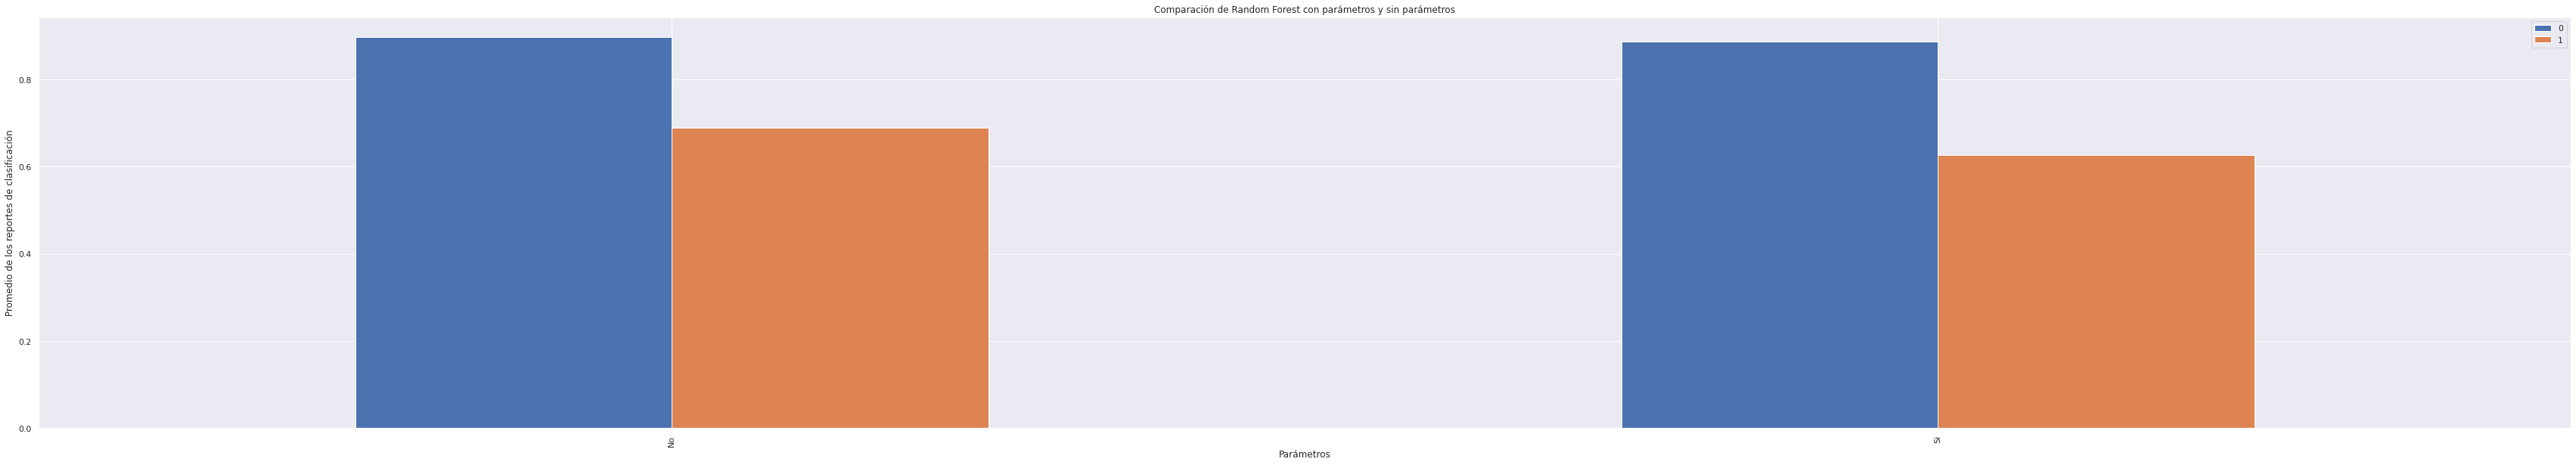

In [176]:
y = df10.loc[df10['Algoritmo'] == 'Random Forest']
x = y.groupby('Párametros').mean().plot(kind='bar')
plt.title('Comparación de Random Forest con parámetros y sin parámetros')
plt.xlabel('Parámetros')
plt.ylabel('Promedio de los reportes de clasificación')
plt.show()

# Haciendo click se puede agrandar el gráfico

Se puede ver una disminución para los valores positivos para Random Forest con sintonización de parámetros.

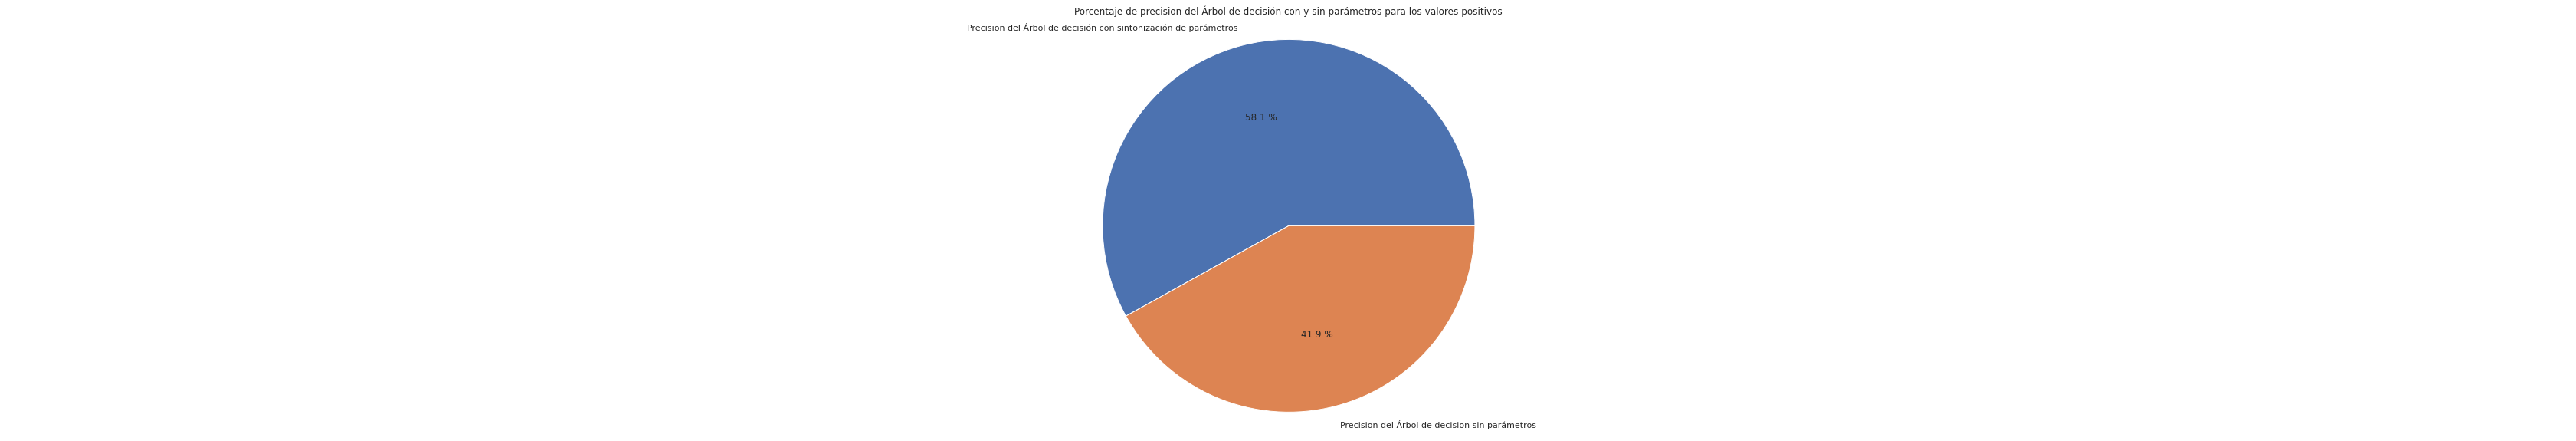

In [194]:
#Capturando el valor de Árbol de decisión    parámetros: si     métrica precision
acc_c_a = df10.drop(df10[df10['Algoritmo']!='Árbol de decisión'].index)
acc_c_a1 = acc_c_a
acc_c_a1 = acc_c_a1.drop(acc_c_a1[acc_c_a1['Párametros']!='Si'].index)
acc_c_a2 = acc_c_a1
acc_c_a2 = acc_c_a2.drop(acc_c_a2[acc_c_a2['Métrica']!='Precision'].index)
acc_c_a2
acc_c_a2 = acc_c_a2.rename(columns={'1':'valor'})
totalacc = sum(acc_c_a2.valor)


#Capturando el valor de Árbol de decisión    parámetros: no     métrica precision
acc_c_an = df10.drop(df10[df10['Algoritmo']!='Árbol de decisión'].index)
acc_c_an1 = acc_c_an
acc_c_an1 = acc_c_an1.drop(acc_c_an1[acc_c_an1['Párametros']=='Si'].index)
acc_c_an2 = acc_c_an1
acc_c_an2 = acc_c_an2.drop(acc_c_an2[acc_c_an2['Métrica']!='Precision'].index)
acc_c_an2 = acc_c_an2.rename(columns={'1':'valor'})
totalaccn2 = sum(acc_c_an2.valor)

gtpresarbol = [totalacc,totalaccn2]
nombre1 = ["Precision del Árbol de decisión con sintonización de parámetros","Precision del Árbol de decision sin parámetros"]
plt.pie(gtpresarbol, labels=nombre1, autopct="%0.1f %%")
plt.axis("equal")
plt.title('Porcentaje de precision del Árbol de decisión con y sin parámetros para los valores positivos')
plt.show()

De acuerdo al gráfico partes de un total se puede concluir que: La precision del Árbol de decisión con parámetros es 16,2% mas preciso a la hora de detectar un dato correcto en comparación con el árbol de decisin sin parámetros sintonizados.

# Conclusión

En conclusión, comparando los seis modelos sin parámetros y con sintonización de parámetros, el mejor algoritmo que ofrece un buen resultado y que puede ser utilizado para predecir los días de lluvia es Random Forest sin parámetros.
<br><br>
Si comparamos los modelos de K-Neighbors entre ellos, con o sin parámetros, este modelo mejora con la sintonización de parámetros, al igual que con el Árbol de decisión, en donde este último tiene una gran mejora.
<br><br>
Como se dijo anteriormente, al usar la sintonización de parámetros Random Forest tiene un peor desempeño, quedandose así Random Forest sin parámetros como el algoritmo que da mejores predicciones.
<br><br>
Finalmente, se debe tomar en cuenta el desbalanceo de datos que existe para la variable RainTomorrow y como esta afecta a la predicción final, teniendo un alto porcentaje de predicción para valores negativos (Que son los que mas hay) y un bajo porcentaje de predicción de valores positivos (Que son los que menos hay).